<a href="https://colab.research.google.com/github/ValerieLangat/DS-Project-2---Predictive-Modeling/blob/master/Project_2_Trial_and_Error_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install category_encoders

     |████████████████████████████████| 92kB 3.5MB/s 


In [0]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/ValerieLangat/DS-Project-2---Predictive-Modeling/master/efw_cc.csv')

In [0]:
data = data.drop(["year","ISO_code", "countries", "rank", "quartile"], axis=1)

In [0]:
data = data.dropna(thresh=17)

In [0]:
data = data.fillna(data.mean())

In [0]:
train, test = train_test_split(data, test_size=0.2)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.impute import SimpleImputer 
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(data)
data = imputer.transform(data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
nulls = data.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
features = ['1a_government_consumption', '1c_gov_enterprises', '1d_top_marg_tax_rate', '2a_judicial_independence', '3c_inflation',
'3d_freedom_own_foreign_currency', '4a_tariffs', '4c_black_market', '4d_control_movement_capital_ppl', '5a_credit_market_reg', '5b_labor_market_reg']
X_train = train[features]
X_test = test[features]

target = 'ECONOMIC FREEDOM'
y_train = train[target]
y_test = test[target]
y_pred = linreg.predict(X_test)
print('Validation RMSLE, Mean Baseline:', rmsle(y_test, y_pred))

Validation RMSLE, Mean Baseline: 0.16793245874656026


In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
print('Validation R^2', r2)

Validation R^2 0.48973294759290975


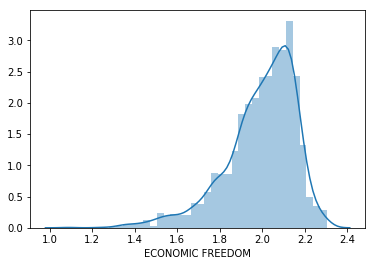

In [15]:
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log);

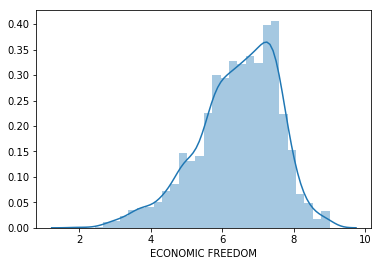

In [16]:
y_train_log_exp = np.expm1(y_train_log)
sns.distplot(y_train_log_exp);

In [17]:
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
rmsle(y_test, y_pred)

0.13109309561551988

In [18]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
  
y_test_log = np.log1p(y_test)
rmse(y_test_log, y_pred_log)

0.13109309561551988

In [0]:
import xgboost as xgb

In [19]:
import category_encoders as ce
from xgboost import XGBRegressor
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

eval_set = [(X_train_encoded, y_train_log), 
            (X_test_encoded, y_test_log)]


model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=10)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.35314	validation_1-rmse:1.34319
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.21994	validation_1-rmse:1.21013
[2]	validation_0-rmse:1.10023	validation_1-rmse:1.09047
[3]	validation_0-rmse:0.992645	validation_1-rmse:0.983484
[4]	validation_0-rmse:0.895986	validation_1-rmse:0.887285
[5]	validation_0-rmse:0.809215	validation_1-rmse:0.801122
[6]	validation_0-rmse:0.731341	validation_1-rmse:0.72386
[7]	validation_0-rmse:0.661526	validation_1-rmse:0.654755
[8]	validation_0-rmse:0.598943	validation_1-rmse:0.592894
[9]	validation_0-rmse:0.542935	validation_1-rmse:0.537061
[10]	validation_0-rmse:0.492828	validation_1-rmse:0.487853
[11]	validation_0-rmse:0.448053	validation_1-rmse:0.443632
[12]	validation_0-rmse:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
features = ['1a_government_consumption', '1c_gov_enterprises', '1d_top_marg_tax_rate', '2a_judicial_independence', '3c_inflation',
'3d_freedom_own_foreign_currency', '4a_tariffs', '4c_black_market', '4d_control_movement_capital_ppl', '5a_credit_market_reg', '5b_labor_market_reg']
X_train = train[features]
X_test = test[features]

In [0]:
target = 'Sales'
y_train = train[target]
y_test = test[target]
y_pred = np.full_like(y_test, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_test, y_pred))

In [0]:
features = ['1a_government_consumption', '1c_gov_enterprises', '1d_top_marg_tax_rate', '2a_judicial_independence', '3c_inflation',
'3d_freedom_own_foreign_currency', '4a_tariffs', '4c_black_market', '4d_control_movement_capital_ppl', '5a_credit_market_reg', '5b_labor_market_reg']

target = 'ECONOMIC FREEDOM'
X = train[features]
y = train[target]

In [0]:
train

,ECONOMIC FREEDOM,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,2b_impartial_courts,2c_protection_property_rights,2d_military_interference,2e_integrity_legal_system,2f_legal_enforcement_contracts,2g_restrictions_sale_real_property,2h_reliability_police,2i_business_costs_crime,2j_gender_adjustment,2_property_rights,3a_money_growth,3b_std_inflation,3c_inflation,3d_freedom_own_foreign_currency,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
1258,6.43,9.117647,8.673141,0.0,NaN,5.930263,6.801807,5.538770,6.592345,5.400000,NaN,3.949347,8.829057,8.029513,8.973263,0.931034,6.531012,8.698676,8.403000,7.927033,5.0,7.507177,6.622978,4.716031,10.000000,3.296812,6.158955,8.550588,8.469743,7.886557,8.302296
1098,6.27,7.076471,10.000000,6.0,0.0,5.769118,2.924227,3.759114,5.166155,3.333333,5.000000,3.389827,2.694293,5.115968,8.102368,0.758621,3.857758,9.430930,8.926528,9.749770,0.0,7.026807,7.333378,6.784709,10.000000,3.819003,6.984272,9.021033,4.601654,4.721788,6.114825
438,5.32,6.955882,8.555858,8.0,6.5,7.502935,2.749490,3.743733,6.092919,8.333000,5.000000,2.986000,8.785860,5.884512,5.618866,0.945946,5.318311,9.847259,7.657744,9.472434,10.0,9.244359,7.886782,7.242252,10.000000,9.210324,8.584840,8.529333,5.099999,6.691086,6.773473
1107,6.28,8.532353,9.182561,7.0,6.0,7.678729,5.508107,5.683238,5.772958,3.333333,4.166667,3.614643,6.754936,5.102212,7.325230,1.000000,5.251258,9.168842,8.212036,8.811865,0.0,6.548186,6.478222,6.148186,10.000000,5.020388,6.911699,7.385874,6.442886,6.479670,6.769477
1945,7.12,3.991924,6.784741,2.0,NaN,4.258889,3.015873,4.059140,2.431694,2.150000,4.030000,4.386016,6.570805,NaN,NaN,0.666667,3.171848,7.505443,6.178148,9.287104,5.0,6.992674,6.097778,6.360679,7.931034,2.889344,5.819709,4.295256,4.978582,5.544346,4.939395
1019,6.17,8.029412,8.446322,0.0,7.0,5.868933,3.527705,4.473649,5.726579,1.666667,7.500000,4.868480,8.534838,5.212800,7.473675,0.962963,5.341919,7.401228,5.801184,8.372612,0.0,5.393756,5.114533,4.089567,10.000000,1.651787,5.213972,4.850582,7.579806,6.054633,6.161673
2257,7.36,7.470286,9.936785,7.0,6.0,7.601768,5.000000,4.666667,2.833333,3.333333,6.666667,3.704467,6.934074,NaN,NaN,0.777778,4.208069,8.709458,7.885041,8.432379,10.0,8.756719,6.633333,5.500000,10.000000,8.229500,7.590708,6.314154,7.493581,5.535483,6.447740
1028,6.18,4.823529,4.051771,8.0,6.0,5.718825,3.888450,2.979104,5.771030,8.333333,7.500000,4.125038,5.715279,5.027756,6.264980,1.000000,5.511663,9.986802,9.615679,9.057667,10.0,9.665037,8.340670,6.872563,10.000000,5.050418,7.565913,6.000000,4.517107,6.260958,5.592688
2655,7.69,7.582613,9.836512,10.0,10.0,9.354781,7.682000,8.851000,6.301260,5.000000,8.333333,7.689605,7.335885,NaN,NaN,1.000000,7.313298,9.457612,7.726908,9.247312,10.0,9.107958,9.933333,9.384227,10.000000,9.573380,9.722735,9.699873,8.881930,8.661765,9.081189
705,5.79,8.500000,9.853042,10.0,5.5,8.463261,3.378148,3.992452,4.718733,6.666667,3.300000,3.389827,9.302349,2.993407,1.609525,0.962963,4.291376,9.272326,9.031113,9.244000,10.0,9.386860,8.518044,6.768499,10.000000,7.461472,8.187004,9.036843,4.798856,6.390070,6.741923


In [0]:
data 

In [0]:
np.all(np.isfinite(data))

False

In [0]:
np.any(np.isnan(data))

True

In [0]:
null_counts = data.isnull().sum().sort_values(ascending=False)
null_counts.reset_index()

In [0]:
data = data.dropna(thresh=17)

In [0]:
target = 'Sales'
y_train = train[target]
y_test = test[target]
y_pred = np.full_like(y_test, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_test, y_pred))

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()
steps = [('imputation', imp),('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                 test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored

In [0]:
train, test = train_test_split(data, test_size=0.2)
train, val = train_test_split(trainval, train_size=0.8)

In [0]:
features = ['1a_government_consumption', '1c_gov_enterprises', '1d_top_marg_tax_rate', '2a_judicial_independence', '3c_inflation',
'3d_freedom_own_foreign_currency', '4a_tariffs', '4c_black_market', '4d_control_movement_capital_ppl', '5a_credit_market_reg', '5b_labor_market_reg']
X_train = train[features]
X_test = test[features]

In [0]:
target = 'ECONOMIC FREEDOM'
y_train = train[target]
y_test = test[target]
y_pred = np.full_like(y_test, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_test, y_pred))

ValueError: ignored

In [0]:
data = data.fillna(data.mean())

In [0]:
data['ECONOMIC FREEDOM'].mean()

6.519640359640352

In [0]:
data['Mean Baseline'] = data['ECONOMIC FREEDOM'].mean()

In [0]:
y = data['ECONOMIC FREEDOM']
mae = mean_absolute_error(y, data['Mean Baseline'] )
r2 = r2_score(y, data['Mean Baseline'])

print(f'MAE: {mae}\tR^2: {r2}')

MAE: 0.9015873969520332	R^2: 1.1102230246251565e-16


In [0]:
data.dtypes.value_counts()

float64    34
object      2
int64       1
dtype: int64

In [0]:
trainval, test = train_test_split(data, test_size=0.2)

In [0]:
train, val = train_test_split(trainval, train_size=0.8)

In [0]:
features = ['1a_government_consumption', '1c_gov_enterprises', '1d_top_marg_tax_rate', '2a_judicial_independence', '3c_inflation',
'3d_freedom_own_foreign_currency', '4a_tariffs', '4c_black_market', '4d_control_movement_capital_ppl', '5a_credit_market_reg', '5b_labor_market_reg']
target = 'ECONOMIC FREEDOM'
model = LinearRegression()


model.fit(train[features], train[target])
y = test[target]
y_pred = model.predict(test[features])

mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [0]:
print(f'MAE: {mae}\tR^2: {r2}')
print('Coefficients: ',  model.coef_)
print('Intercept: ',  model.intercept_)

MAE: 0.8758443340719413	R^2: 0.060039306529466985
Coefficients:  [ 0.05944688 -0.01084929 -0.05577689  0.109884   -0.12003521 -0.00112966
 -0.03768151 -0.00866853  0.00724661 -0.0158518  -0.10703524]
Intercept:  8.16947788913403
